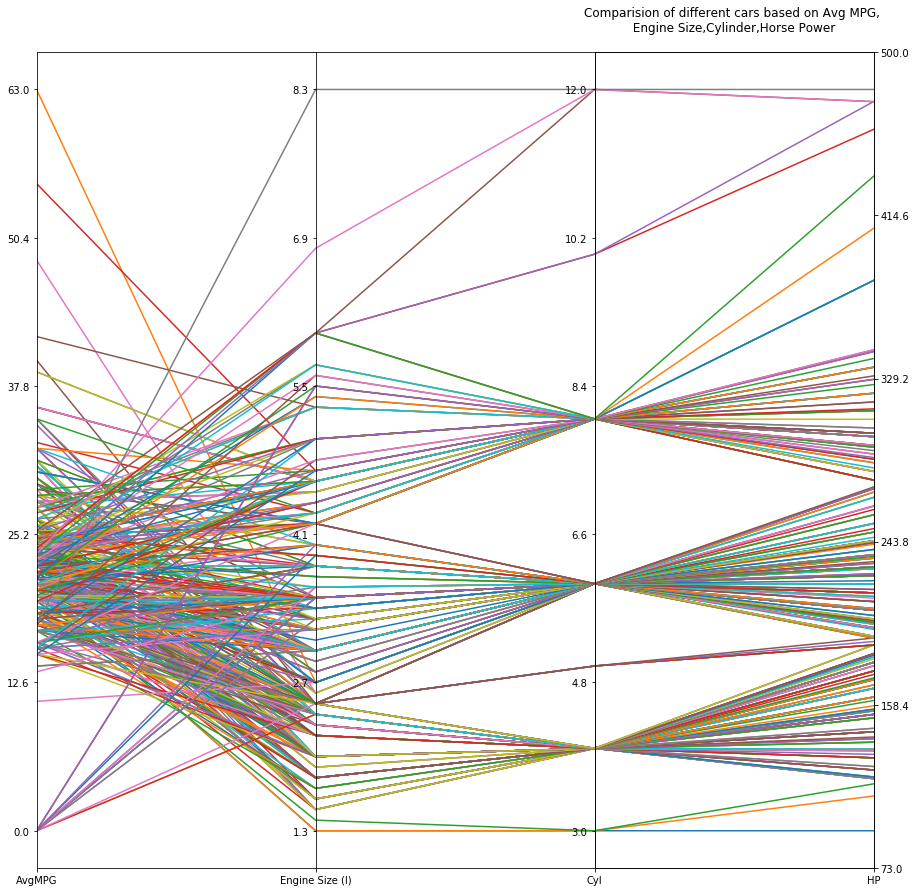

In [1]:
from matplotlib import ticker
import matplotlib.pyplot as plt
import pylab as plt
%matplotlib inline
import pandas as pd
import numpy as np
from pylab import *

df = pd.read_csv('C:/Users/rajas/Desktop/assignment03-carvisualization-rajasekhar6057-master/cardata.csv')

cols = ['AvgMPG', 'Engine Size (l)', 'Cyl', 'HP']
x = [i for i, _ in enumerate(cols)]
colours = ['#2e8ad8', '#cd3785', '#c64c00', '#889a00']

# create dict of categories: colours
#colours = {df['AvgMPG'].cat.categories[i]: colours[i] for i, _ in enumerate(df['AvgMPG'].cat.categories)}

# Create (X-1) sublots along x axis
fig, axes = plt.subplots(1, len(x)-1, sharey=False, figsize=(15,15))

# Get min, max and range for each column
# Normalize the data for each column
min_max_range = {}
for col in cols:
    min_max_range[col] = [df[col].min(), df[col].max(), np.ptp(df[col])]
    df[col] = np.true_divide(df[col] - df[col].min(), np.ptp(df[col]))

# Plot each row
for i, ax in enumerate(axes):
    for idx in df.index:
        mpg_category = df.loc[idx, 'AvgMPG']
 #       ax.plot(x, df.loc[idx, cols], colours[mpg_category])
        ax.plot(x, df.loc[idx, cols])
    ax.set_xlim([x[i], x[i+1]])
    
# Set the tick positions and labels on y axis for each plot
# Tick positions based on normalised data
# Tick labels are based on original data
def set_ticks_for_axis(dim, ax, ticks):
    min_val, max_val, val_range = min_max_range[cols[dim]]
    step = val_range / float(ticks-1)
    tick_labels = [round(min_val + step * i, 2) for i in range(ticks)]
    norm_min = df[cols[dim]].min()
    norm_range = np.ptp(df[cols[dim]])
    norm_step = norm_range / float(ticks-1)
    ticks = [round(norm_min + norm_step * i, 2) for i in range(ticks)]
    ax.yaxis.set_ticks(ticks)
    ax.set_yticklabels(tick_labels)

for dim, ax in enumerate(axes):
    ax.xaxis.set_major_locator(ticker.FixedLocator([dim]))
    set_ticks_for_axis(dim, ax, ticks=6)
    ax.set_xticklabels([cols[dim]])
    

# Move the final axis' ticks to the right-hand side
ax = plt.twinx(axes[-1])
dim = len(axes)
ax.xaxis.set_major_locator(ticker.FixedLocator([x[-2], x[-1]]))
set_ticks_for_axis(dim, ax, ticks=6)
ax.set_xticklabels([cols[-2], cols[-1]])


# Remove space between subplots
plt.subplots_adjust(wspace=0)

# Add legend to plot
'''
plt.legend(
[plt.Line2D((0,1),(0,0), color=colours[cat]) for cat in df['AvgMPG'].cat.categories],
df['AvgMPG'].cat.categories,
bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
'''

plt.title('Comparision of different cars based on Avg MPG, \n Engine Size,Cylinder,Horse Power \n ')


plt.show()